<a href="https://colab.research.google.com/github/nelsonbeas33/AprendizajeAutomaticoFCFM/blob/main/tarea6/tarea6AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
from google.colab import drive
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
import math

In [7]:
drive.mount('/AA_FCFM/')


Mounted at /AA_FCFM/


Transformaciones necesarias para mejorar el tratamiento de los datos

In [8]:
data = pd.read_csv("/AA_FCFM/MyDrive/AA_FCFM/Cancer_Data.csv")
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=["Unnamed: 32"])
print(data)

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

In [9]:
data_unlabel = data.drop(columns=["diagnosis"])
lable = data["diagnosis"]

In [10]:
k_best = SelectKBest(score_func=f_regression, k = 16)
fit = k_best.fit(data_unlabel, lable)
data_unlabel.columns[fit.get_support(indices=True)].tolist()

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [11]:
data[data_unlabel.columns[fit.get_support(indices=True)].tolist()]

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650


In [70]:
MatrixData = data[data_unlabel.columns[fit.get_support(indices=True)].tolist()].to_numpy().reshape(len(data),4, 4)

trainMatrixData = MatrixData[:math.floor(len(MatrixData)*0.8)]
testMatrixData = MatrixData[math.floor(len(MatrixData)*0.8):]

trainLable = data["diagnosis"][:math.floor(len(data)*0.8)]
testLable = data["diagnosis"][math.floor(len(data)*0.8):]


In [71]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (2, 2), activation='relu', input_shape=(4, 4, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
historial = modelo.fit(x = trainMatrixData, y = trainLable, epochs=8)


Epoch 1/8
15/15 [==============================] - 1s 5ms/step - loss: 3.7277 - accuracy: 0.4088
Epoch 2/8
15/15 [==============================] - 0s 3ms/step - loss: 2.2080 - accuracy: 0.4088
Epoch 3/8
15/15 [==============================] - 0s 3ms/step - loss: 1.5626 - accuracy: 0.4088
Epoch 4/8
15/15 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.4088
Epoch 5/8
15/15 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4088
Epoch 6/8
15/15 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.4088
Epoch 7/8
15/15 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.4088
Epoch 8/8
15/15 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.4088


In [77]:
historial.history["loss"]

[3.7277207374572754,
 2.2079672813415527,
 1.5626170635223389,
 1.0649425983428955,
 0.6985073089599609,
 0.5142748355865479,
 0.47846728563308716,
 0.4778924584388733]

In [73]:
results = modelo.evaluate(testMatrixData, testLable, batch_size=8)
print("test loss, test acc:", results)

15/15 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.2281
test loss, test acc: [0.3699038624763489, 0.22807016968727112]


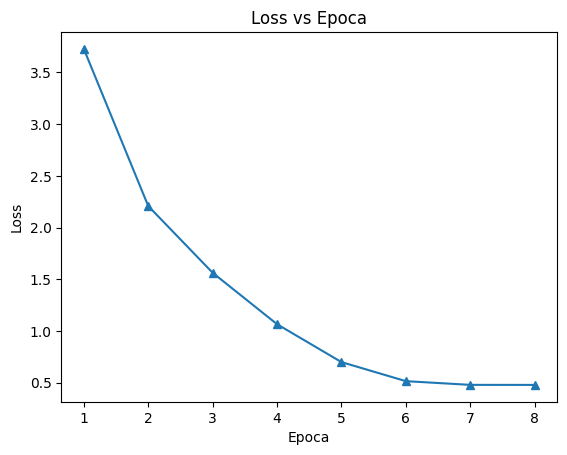

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
epoca = ['1', '2', '3', '4', '5', '6', '7', "8"]
test = [28.5, 30.5, 41, 30, 28, 27.5, 30.5]
ax.plot(epoca, historial.history["loss"], marker = '^')
plt.title("Loss vs Epoca")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

4/4 [==============================] - 0s 4ms/step


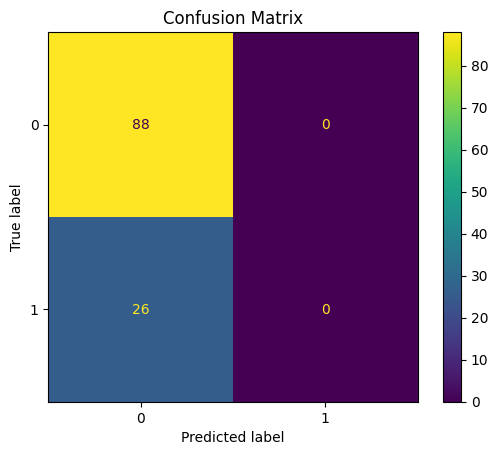

In [145]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = modelo.predict(testMatrixData)
predictions = [0 if pred > 0.5 else 1 for pred in predictions]
y_test = testLable
cm = confusion_matrix(y_test, predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()